In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

data = pd.read_csv(r'C:\Users\sopli\Área de Trabalho\Programming\Personal\Python\Automobile-Insurance-Claim-Prediction2\insurance_claims.csv')

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
data.shape

(1000, 39)

In [4]:
data.size

39000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.isna().sum()                                  #Checks How many missing values there are

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

fraud_reported
N    753
Y    247
Name: count, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

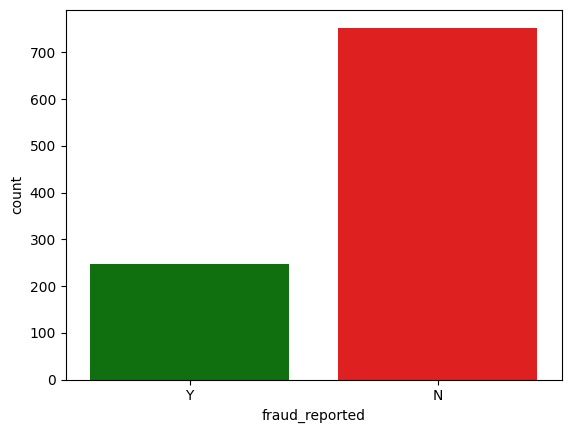

In [7]:
print(data['fraud_reported'].value_counts())
sb.countplot(x='fraud_reported', data=data, palette={'Y': 'green', 'N': 'red'})

<Axes: xlabel='incident_state'>

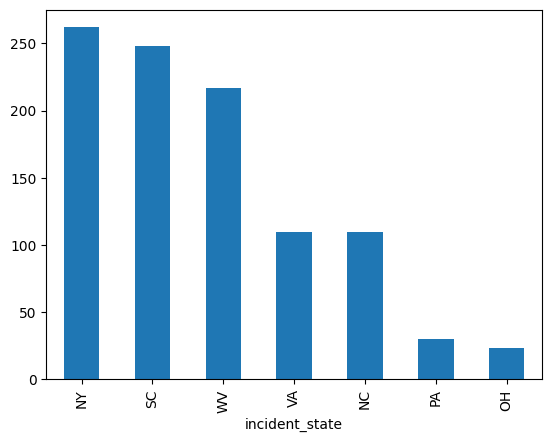

In [8]:
data['incident_state'].value_counts().plot(kind= 'bar')

<Axes: xlabel='incident_state', ylabel='count'>

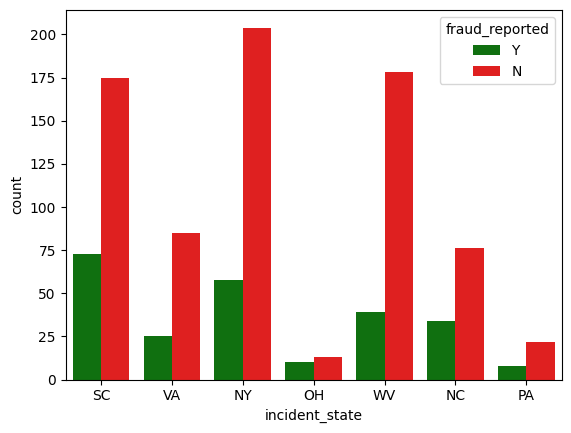

In [9]:
sb.countplot(x='incident_state', data=data, hue='fraud_reported', palette={'Y': 'green', 'N': 'red'})

<Axes: xlabel='policy_state', ylabel='count'>

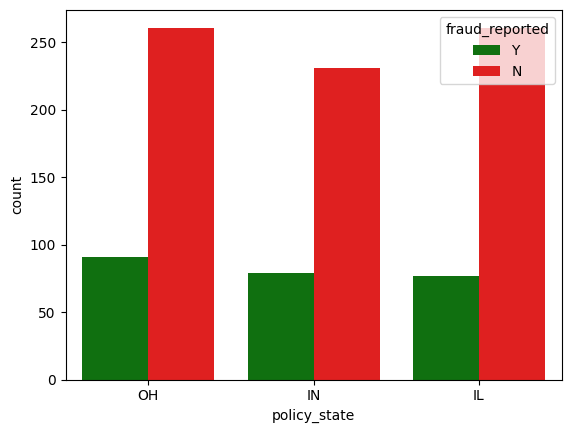

In [10]:
sb.countplot(x='policy_state', data=data, hue='fraud_reported', palette={'Y': 'green', 'N': 'red'})

<Axes: xlabel='incident_type', ylabel='count'>

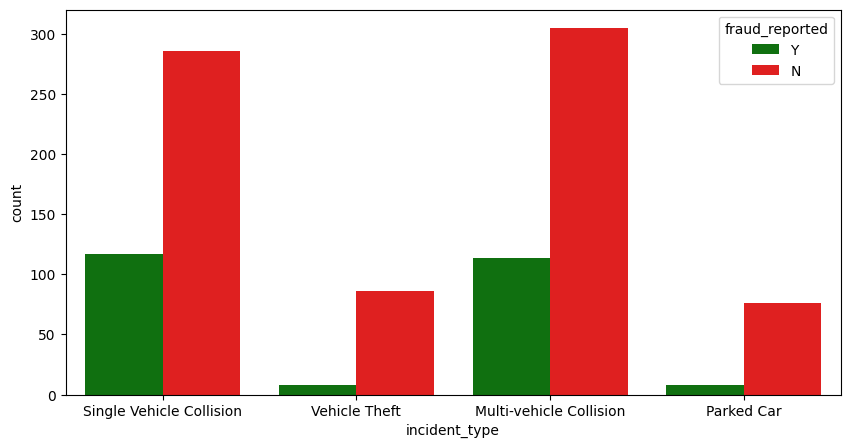

In [11]:
plt.figure(figsize=(10,5))
sb.countplot(x='incident_type', data=data, hue='fraud_reported', palette={'Y': 'green', 'N': 'red'})

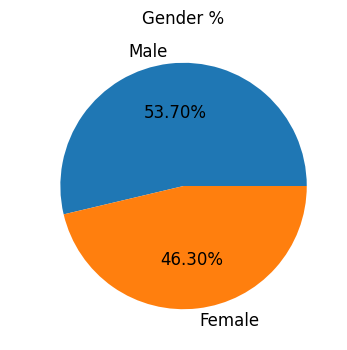

In [12]:
fig = plt.figure(figsize=(6,4))
ax = (data['insured_sex'].value_counts()* 100.0 /len(data))\
.plot.pie(autopct='%.2f%%', labels = ['Male', 'Female'], fontsize=12) 
ax.set_title('Gender %')
ax.set(ylabel=' ')
plt.show()                                                                                  

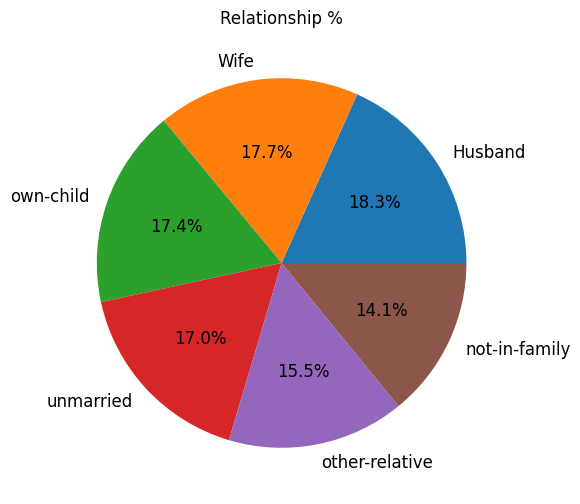

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = (data['insured_relationship'].value_counts()* 100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Husband', 'Wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'], 
          fontsize=12) 
ax.set_title('Relationship %')
#Hide y-axis label
ax.set(ylabel=' ')
plt.show()

<Axes: xlabel='police_report_available'>

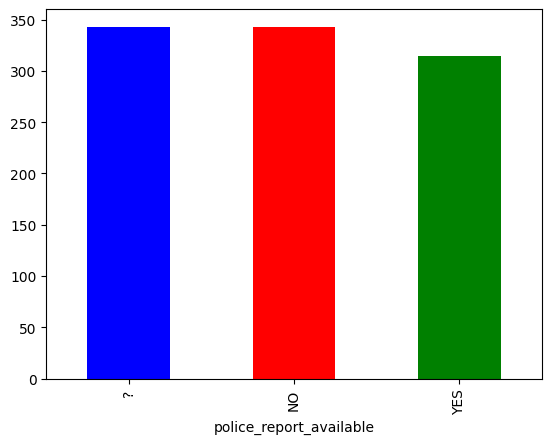

In [14]:
color_map = {'?': 'blue', 'YES': 'green', 'NO': 'red'}
data['police_report_available'].value_counts().plot(kind='bar', color=[color_map[val] for val in data['police_report_available'].value_counts().index])

<Axes: xlabel='property_damage'>

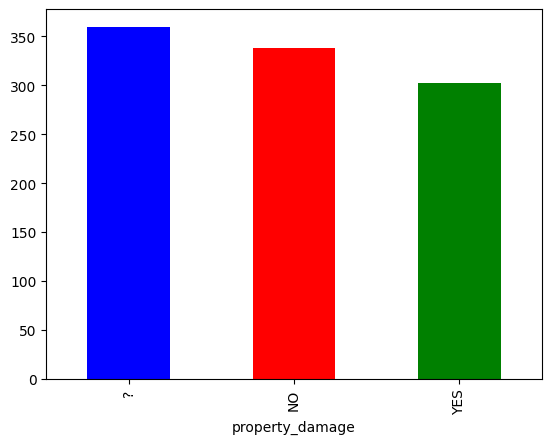

In [15]:
color_map = {'?': 'blue', 'YES': 'green', 'NO': 'red'}
data['property_damage'].value_counts().plot(kind='bar', color=[color_map[val] for val in data['property_damage'].value_counts().index])

<Axes: xlabel='collision_type'>

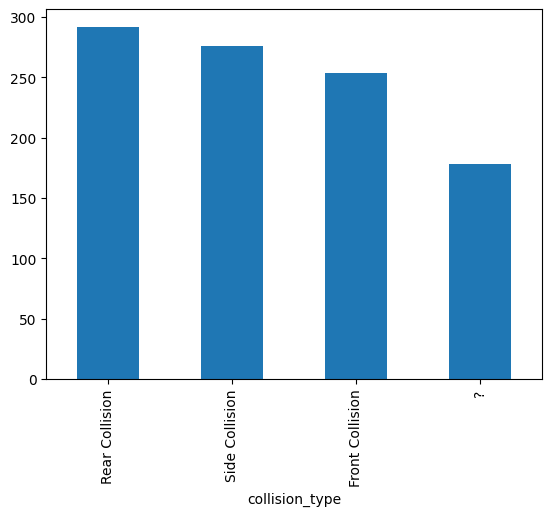

In [16]:
data.collision_type.value_counts().plot(kind= 'bar')

In [17]:
data.replace('?', np.nan, inplace= True)                        #replacing ? as NULL values

In [18]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [19]:
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['authorities_contacted'] = data['authorities_contacted'].fillna(data['authorities_contacted'].mode()[0])

#mode fills any missing values in the column with the most frequent value in that column

In [22]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data['insured_sex'] = le.fit_transform(data['insured_sex'])
data['insured_relationship'] = le.fit_transform(data['insured_relationship'])
data['incident_type'] = le.fit_transform(data['incident_type'])
data['policy_state'] = le.fit_transform(data['policy_state'])
data['insured_education_level'] = le.fit_transform(data['insured_education_level'])
data['insured_occupation'] = le.fit_transform(data['insured_occupation'])
data['insured_hobbies'] = le.fit_transform(data['insured_hobbies'])
data['insured_relationship'] = le.fit_transform(data['insured_relationship'])
data['collision_type'] = le.fit_transform(data['collision_type'])
data['incident_severity'] = le.fit_transform(data['incident_severity'])
data['authorities_contacted'] = le.fit_transform(data['authorities_contacted'])

data['incident_state'] = le.fit_transform(data['incident_state'])
data['incident_city'] = le.fit_transform(data['incident_city'])
data['incident_location'] = le.fit_transform(data['incident_location'])
data['property_damage'] = le.fit_transform(data['property_damage'])
data['police_report_available'] = le.fit_transform(data['police_report_available'])
data['auto_make'] = le.fit_transform(data['auto_make'])
data['auto_model'] = le.fit_transform(data['auto_model'])
data['fraud_reported'] = le.fit_transform(data['fraud_reported'])

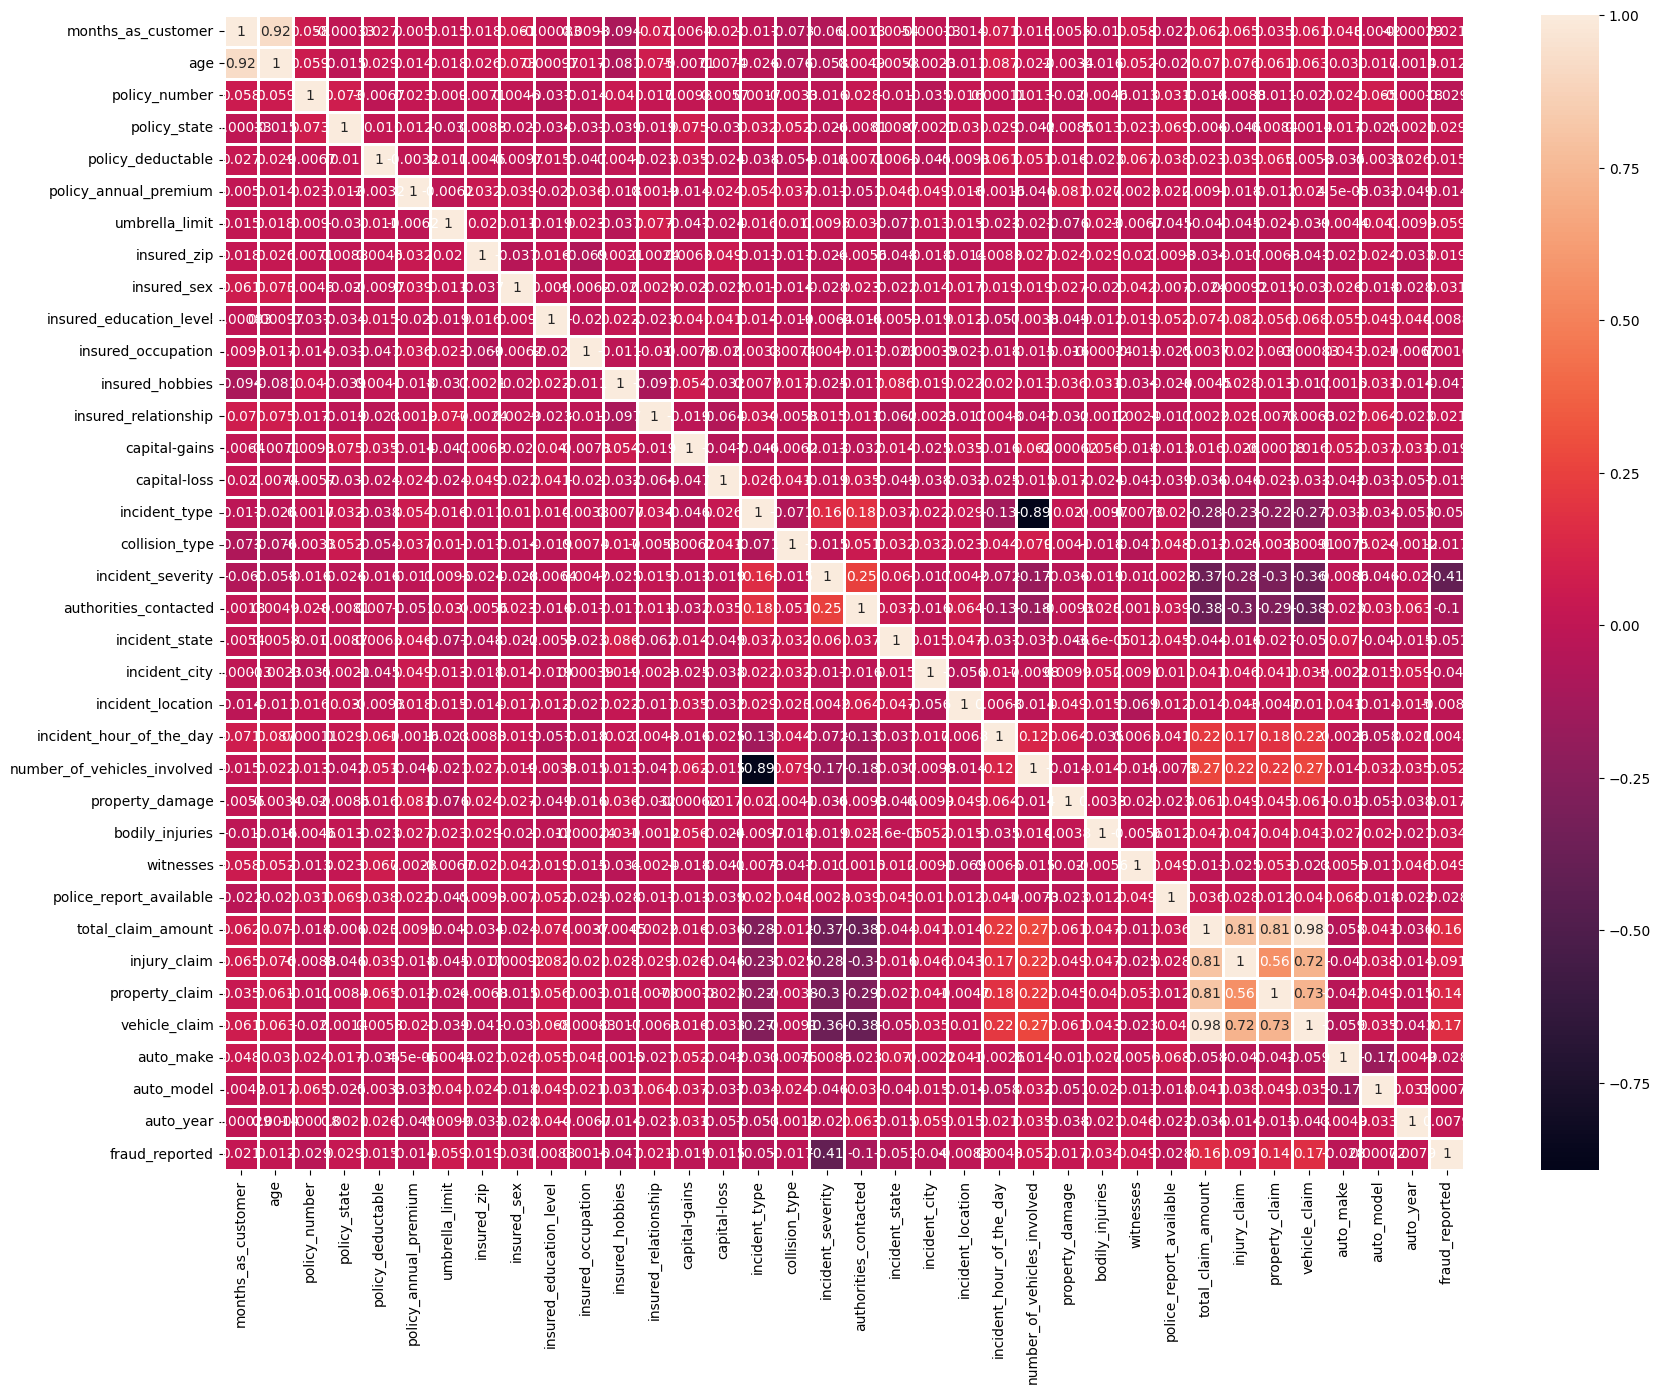

In [27]:
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(20, 15))
sb.heatmap(data=numeric_data.corr(), annot=True, fmt='.2g', linewidth=1)
plt.show()

#generates a heatmap of the correlation matrix of the data

In [31]:
numeric_data = data.select_dtypes(include=['number'])
corrs = numeric_data.corr()['fraud_reported']
# Filter correlations greater than 0.001
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
# Sort correlations in descending order
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

In [32]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [35]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors='coerce')
data['incident_date'] = pd.to_datetime(data['incident_date'], errors='coerce')

print(data[['policy_bind_date', 'incident_date']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   policy_bind_date  1000 non-null   datetime64[ns]
 1   incident_date     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 15.8 KB
None


In [37]:
columns_to_encode = ['policy_state', 'insured_sex', 'incident_type']
for col in columns_to_encode:
    data[col] = le.fit_transform(data[col])

# Check the result
print(data[columns_to_encode].head())


   policy_state  insured_sex  incident_type
0             2            1              2
1             1            1              3
2             2            0              0
3             0            0              2
4             0            1              3


In [38]:
data = pd.get_dummies(data, columns=['auto_make', 'incident_city'], drop_first=True)

# Check the result
print(data.head())


   months_as_customer  age  policy_number policy_bind_date  policy_state  \
0                 328   48         521585       2014-10-17             2   
1                 228   42         342868       2006-06-27             1   
2                 134   29         687698       2000-09-06             2   
3                 256   41         227811       1990-05-25             0   
4                 228   44         367455       2014-06-06             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  insured_education_level  insured_occupation  \
0       466132        

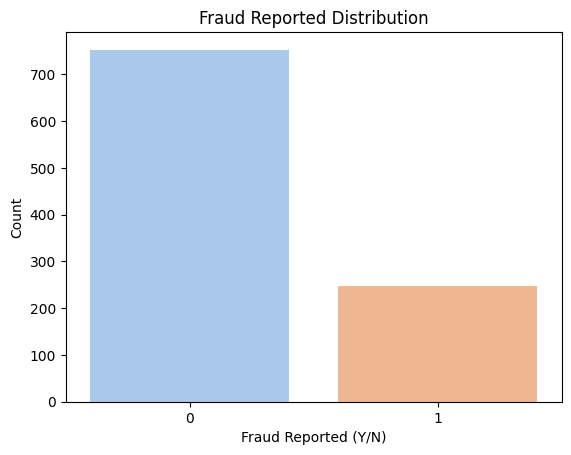

fraud_reported
0    753
1    247
Name: count, dtype: int64


In [39]:
fraud_distribution = data['fraud_reported'].value_counts()

# Plot fraud distribution

sb.countplot(x='fraud_reported', data=data, palette='pastel')
plt.title('Fraud Reported Distribution')
plt.xlabel('Fraud Reported (Y/N)')
plt.ylabel('Count')
plt.show()

print(fraud_distribution)


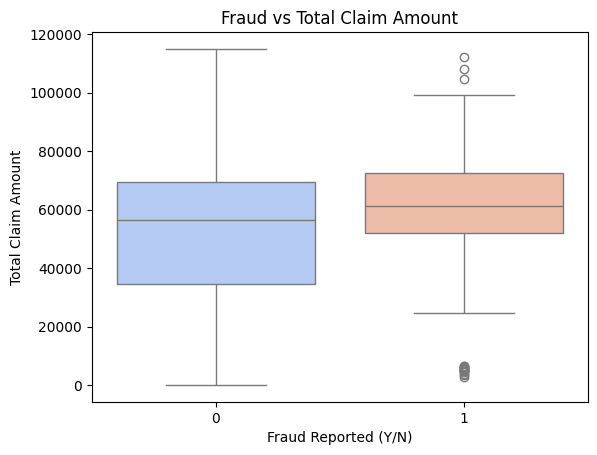

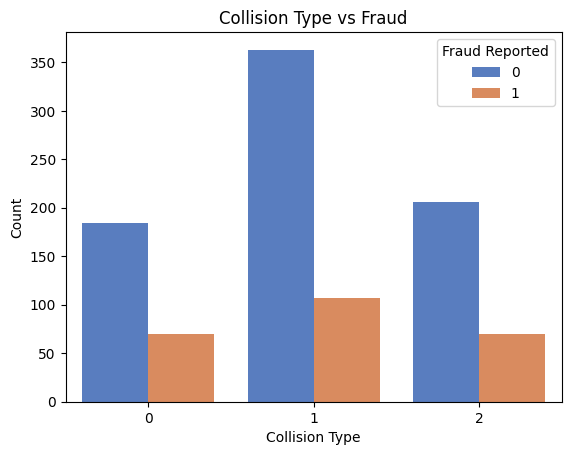

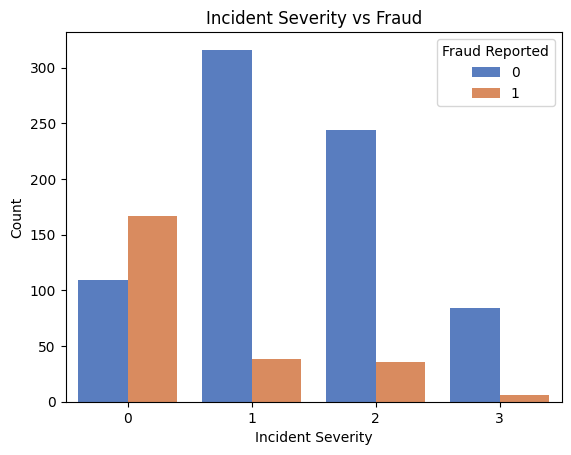

In [41]:
# Relationship between fraud and total claim amount
sb.boxplot(x='fraud_reported', y='total_claim_amount', data=data, palette='coolwarm')
plt.title('Fraud vs Total Claim Amount')
plt.xlabel('Fraud Reported (Y/N)')
plt.ylabel('Total Claim Amount')
plt.show()

# Countplot for collision type and fraud
sb.countplot(x='collision_type', hue='fraud_reported', data=data, palette='muted')
plt.title('Collision Type vs Fraud')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

# Countplot for incident severity and fraud
sb.countplot(x='incident_severity', hue='fraud_reported', data=data, palette='muted')
plt.title('Incident Severity vs Fraud')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.legend(title='Fraud Reported')
plt.show()

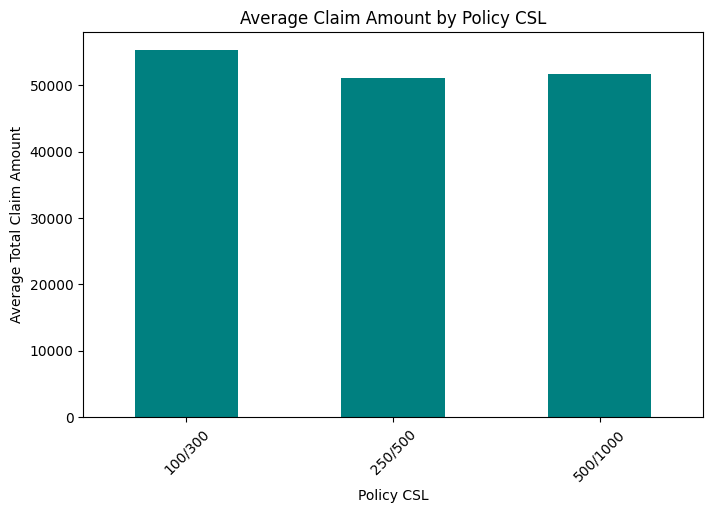

policy_csl
100/300     55265.702006
250/500     51153.732194
500/1000    51730.833333
Name: total_claim_amount, dtype: float64


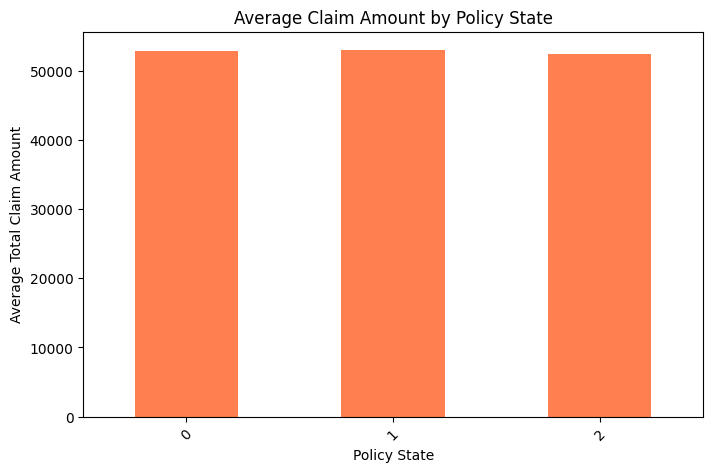

policy_state
0    52844.171598
1    53006.967742
2    52467.187500
Name: total_claim_amount, dtype: float64


In [42]:
# Average claim amounts by policy type (policy_csl)
policy_csl_analysis = data.groupby('policy_csl')['total_claim_amount'].mean()

# Plotting
policy_csl_analysis.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Average Claim Amount by Policy CSL')
plt.xlabel('Policy CSL')
plt.ylabel('Average Total Claim Amount')
plt.xticks(rotation=45)
plt.show()

print(policy_csl_analysis)

# Analyze claim amounts by policy state
policy_state_analysis = data.groupby('policy_state')['total_claim_amount'].mean()

# Plotting
policy_state_analysis.plot(kind='bar', color='coral', figsize=(8, 5))
plt.title('Average Claim Amount by Policy State')
plt.xlabel('Policy State')
plt.ylabel('Average Total Claim Amount')
plt.xticks(rotation=45)
plt.show()

print(policy_state_analysis)

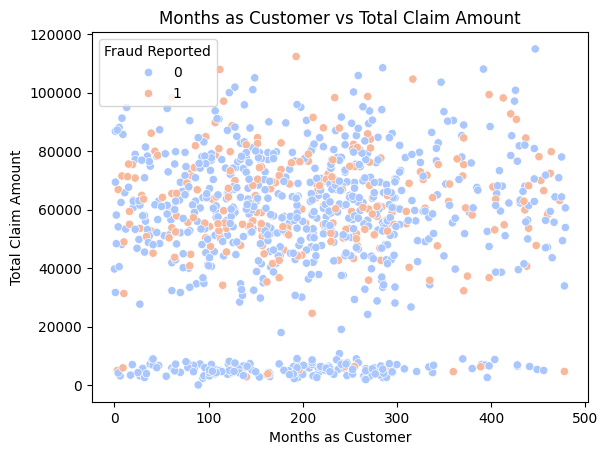

In [44]:
# Scatterplot for months_as_customer vs total_claim_amount
sb.scatterplot(x='months_as_customer', y='total_claim_amount', hue='fraud_reported', data=data, palette='coolwarm')
plt.title('Months as Customer vs Total Claim Amount')
plt.xlabel('Months as Customer')
plt.ylabel('Total Claim Amount')
plt.legend(title='Fraud Reported')
plt.show()

In [47]:
# Reverse one-hot encoding for auto_make
auto_make_columns = [col for col in data.columns if col.startswith('auto_make')]
data['auto_make'] = data[auto_make_columns].idxmax(axis=1).str.replace('auto_make_', '')

# Check for repeated claims by vehicle
repeated_vehicles = data.groupby(['auto_make', 'auto_model']).size().reset_index(name='claim_count')
print(repeated_vehicles[repeated_vehicles['claim_count'] > 1])

   auto_make  auto_model  claim_count
0          1           4           37
1          1           5           32
2          1          23           36
3          1          31           12
4          1          33           20
5         10           1           28
6         10           2           25
7         10           3           27
8         11          15           28
9         11          19           20
10        11          21           32
11        12           9           28
12        12          11           20
13        12          18           22
14        13          20           35
15        13          28           33
16         2           0           18
17         2          22           15
18         2          37           23
19         2          38           16
20         3          25           30
21         3          32           22
22         3          34           24
23         4          27           37
24         4          30           43
25         5

In [46]:
print(data.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_model', 'auto_year',
       'fraud_reported', 'auto_make_1', 'auto_make_2', 'auto_make_3',
       'auto_make_4', 'auto_make_5', 'auto_make_6', 'auto_make_7',
       'auto_make_8', 'auto_make_9', 'auto_make_10', 'auto_make_11',
       'auto_make_12', 'auto

In [48]:
# Reverse one-hot encoding for incident_city
incident_city_columns = [col for col in data.columns if col.startswith('incident_city')]
data['incident_city'] = data[incident_city_columns].idxmax(axis=1).str.replace('incident_city_', '')

# Check for repeated claims by city
repeated_cities = data.groupby(['incident_city']).size().reset_index(name='claim_count')
print(repeated_cities[repeated_cities['claim_count'] > 1])


  incident_city  claim_count
0             1          301
1             2          141
2             3          145
3             4          122
4             5          134
5             6          157


In [49]:
# Check for repeated claims by customer
repeated_customers = data['policy_number'].value_counts()
print(repeated_customers[repeated_customers > 1])


Series([], Name: count, dtype: int64)


In [50]:
# Sort cities by claim count
city_analysis = repeated_cities.sort_values(by='claim_count', ascending=False)
print(city_analysis)

# Analyze fraud cases by city
fraud_by_city = data[data['fraud_reported'] == 1].groupby('incident_city').size().reset_index(name='fraud_count')
fraud_by_city = fraud_by_city.sort_values(by='fraud_count', ascending=False)
print(fraud_by_city)


  incident_city  claim_count
0             1          301
5             6          157
2             3          145
1             2          141
4             5          134
3             4          122
  incident_city  fraud_count
0             1           83
5             6           38
1             2           35
2             3           34
4             5           30
3             4           27


In [51]:
# Sort vehicles by claim count
vehicle_analysis = repeated_vehicles.sort_values(by='claim_count', ascending=False)
print(vehicle_analysis)

# Analyze fraud cases by vehicle
fraud_by_vehicle = data[data['fraud_reported'] == 1].groupby(['auto_make', 'auto_model']).size().reset_index(name='fraud_count')
fraud_by_vehicle = fraud_by_vehicle.sort_values(by='fraud_count', ascending=False)
print(fraud_by_vehicle)


   auto_make  auto_model  claim_count
24         4          30           43
32         7          36           42
0          1           4           37
23         4          27           37
2          1          23           36
14        13          20           35
15        13          28           33
10        11          21           32
1          1           5           32
37         9          29           31
20         3          25           30
11        12           9           28
8         11          15           28
5         10           1           28
7         10           3           27
34         8          12           27
26         5          14           27
31         7          17           25
6         10           2           25
25         5          13           24
22         3          34           24
36         9          26           24
38         9          35           23
18         2          37           23
21         3          32           22
30         6

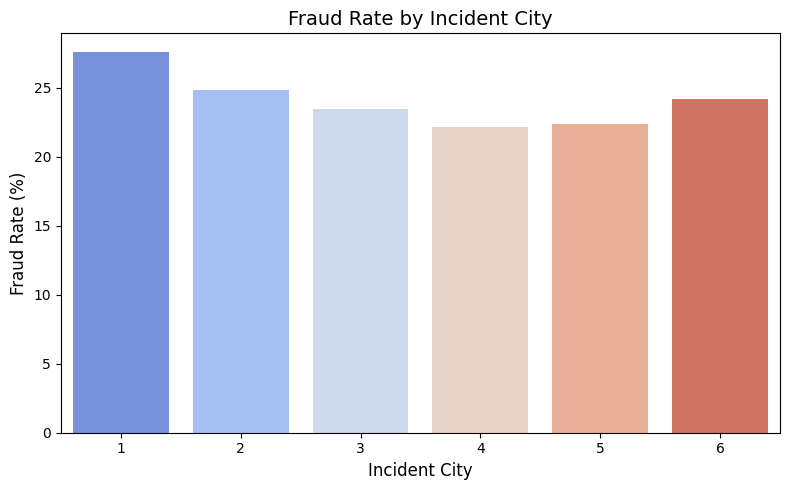

In [53]:
city_data = {
    "incident_city": [1, 6, 3, 2, 5, 4],
    "claim_count": [301, 157, 145, 141, 134, 122],
    "fraud_count": [83, 38, 34, 35, 30, 27]
}

# Create DataFrame
city_data = pd.DataFrame(city_data)

# Calculate fraud rate
city_data['fraud_rate'] = (city_data['fraud_count'] / city_data['claim_count']) * 100

# Sort by fraud rate for better visualization
city_data = city_data.sort_values(by='fraud_rate', ascending=False)

# Create bar plot
plt.figure(figsize=(8, 5))
sb.barplot(data=city_data, x="incident_city", y="fraud_rate", palette="coolwarm")

# Add labels and title
plt.title("Fraud Rate by Incident City", fontsize=14)
plt.xlabel("Incident City", fontsize=12)
plt.ylabel("Fraud Rate (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
# Fraud rate by city
city_analysis['fraud_rate'] = (fraud_by_city['fraud_count'] / city_analysis['claim_count']) * 100
print(city_analysis.sort_values(by='fraud_rate', ascending=False))

# Fraud rate by vehicle
vehicle_analysis = repeated_vehicles.merge(fraud_by_vehicle, on=['auto_make', 'auto_model'], how='left')
vehicle_analysis['fraud_rate'] = (vehicle_analysis['fraud_count'] / vehicle_analysis['claim_count']) * 100
print(vehicle_analysis.sort_values(by='fraud_rate', ascending=False))


  incident_city  claim_count  fraud_rate
0             1          301   27.574751
1             2          141   24.822695
5             6          157   24.203822
2             3          145   23.448276
4             5          134   22.388060
3             4          122   22.131148
   auto_make  auto_model  claim_count  fraud_count  fraud_rate
19         2          38           16            7   43.750000
21         3          32           22            9   40.909091
35         8          24           20            8   40.000000
33         8           7           18            7   38.888889
22         3          34           24            9   37.500000
26         5          14           27           10   37.037037
30         6          10           22            8   36.363636
1          1           5           32           11   34.375000
17         2          22           15            5   33.333333
24         4          30           43           14   32.558140
18         2        

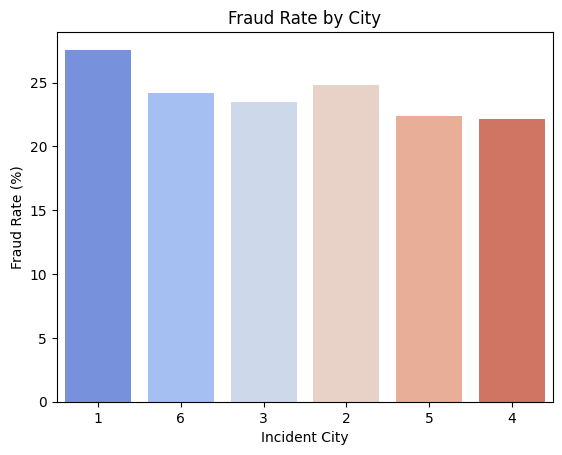

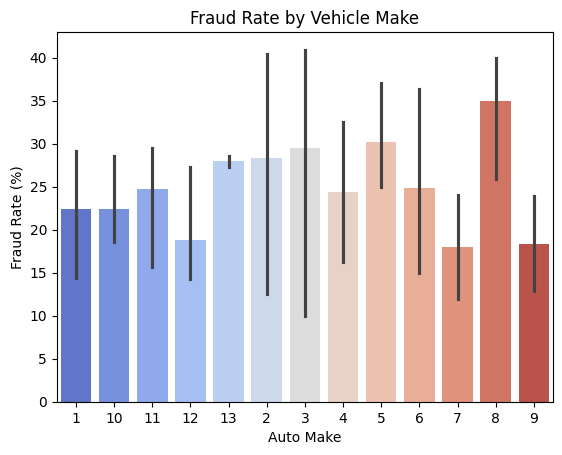

In [55]:
# Fraud by city heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sb.barplot(data=city_analysis, x='incident_city', y='fraud_rate', palette='coolwarm')
plt.title("Fraud Rate by City")
plt.xlabel("Incident City")
plt.ylabel("Fraud Rate (%)")
plt.show()

# Fraud by vehicle heatmap
sns.barplot(data=vehicle_analysis, x='auto_make', y='fraud_rate', palette='coolwarm')
plt.title("Fraud Rate by Vehicle Make")
plt.xlabel("Auto Make")
plt.ylabel("Fraud Rate (%)")
plt.show()

In [57]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_location,incident_hour_of_the_day,...,vehicle_claim,auto_model,auto_year,fraud_reported,auto_make_1,auto_make_2,auto_make_3,auto_make_4,auto_make_5,auto_make_6,auto_make_7,auto_make_8,auto_make_9,auto_make_10,auto_make_11,auto_make_12,auto_make_13,incident_city_1,incident_city_2,incident_city_3,incident_city_4,incident_city_5,incident_city_6,auto_make,incident_city
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,2,2,0,3,4,996,5,...,52080,1,2004,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,10,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,1,1,3,5,628,8,...,3510,12,2007,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,8,5
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,1,1,3,1,685,7,...,23100,30,2007,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,4,1
3,256,41,227811,1990-05-25,0,250/500,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-01-10,2,0,0,3,2,669,5,...,50720,34,2014,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,1
4,228,44,367455,2014-06-06,0,500/1000,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17,3,1,1,3,1,220,20,...,4550,31,2009,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,2,500/1000,1000,1310.80,0,431289,0,5,2,13,4,0,0,2015-02-22,2,0,1,1,0,561,20,...,61040,6,2006,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,6,4
996,285,41,186934,2014-01-05,0,100/300,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2015-01-24,2,1,0,1,4,227,23,...,72320,28,2015,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,13,3
997,130,34,918516,2003-02-17,2,250/500,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,2015-01-23,0,2,1,3,0,746,4,...,52500,19,1996,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,11,1
998,458,62,533940,2011-11-18,0,500/1000,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2015-02-26,2,1,0,2,1,569,2,...,36540,5,1998,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1


In [62]:

# Create a fraud rate column by calculating the mean of 'fraud_reported'
data['fraud_rate'] = data.groupby(['policy_csl', 'policy_deductable', 'umbrella_limit'])['fraud_reported'].transform('mean')

# Group by the policy features and calculate the average fraud rate
policy_fraud_rate = data.groupby(['policy_csl', 'policy_deductable', 'umbrella_limit'])['fraud_rate'].mean().reset_index()

# Sort by fraud rate to identify patterns
policy_fraud_rate = policy_fraud_rate.sort_values(by='fraud_rate', ascending=False)

# Show the result
print(policy_fraud_rate)


   policy_csl  policy_deductable  umbrella_limit  fraud_rate
44    250/500               2000         9000000    1.000000
37    250/500               2000         2000000    1.000000
23    250/500                500         2000000    1.000000
21    100/300               2000         8000000    1.000000
15    100/300               1000        10000000    1.000000
14    100/300               1000         8000000    1.000000
13    100/300               1000         7000000    0.750000
51   500/1000                500         7000000    0.750000
33    250/500               1000         5000000    0.666667
49   500/1000                500         5000000    0.666667
40    250/500               2000         5000000    0.571429
17    100/300               2000         4000000    0.500000
53   500/1000                500         9000000    0.500000
4     100/300                500         5000000    0.500000
29    250/500                500         8000000    0.500000
62   500/1000           

In [61]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_model', 'auto_year',
       'fraud_reported', 'auto_make_1', 'auto_make_2', 'auto_make_3',
       'auto_make_4', 'auto_make_5', 'auto_make_6', 'auto_make_7',
       'auto_make_8', 'auto_make_9', 'auto_make_10', 'auto_make_11',
       'auto_make_12', 'auto

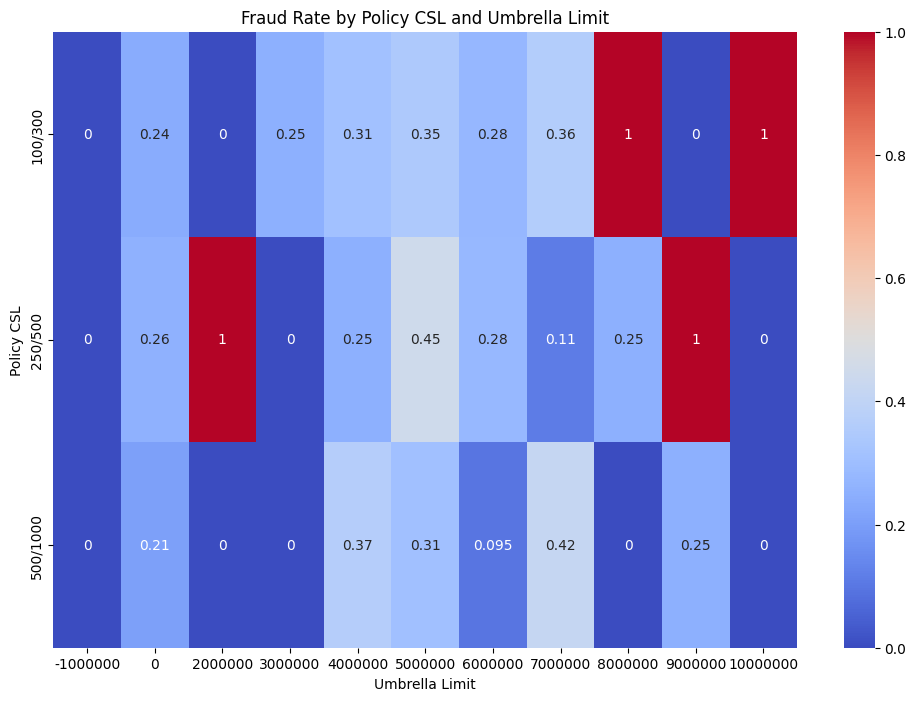

In [63]:
plt.figure(figsize=(12, 8))
sb.heatmap(policy_fraud_rate.pivot_table(index='policy_csl', columns='umbrella_limit', values='fraud_rate', aggfunc='mean', fill_value=0), annot=True, cmap='coolwarm')
plt.title('Fraud Rate by Policy CSL and Umbrella Limit')
plt.xlabel('Umbrella Limit')
plt.ylabel('Policy CSL')
plt.show()

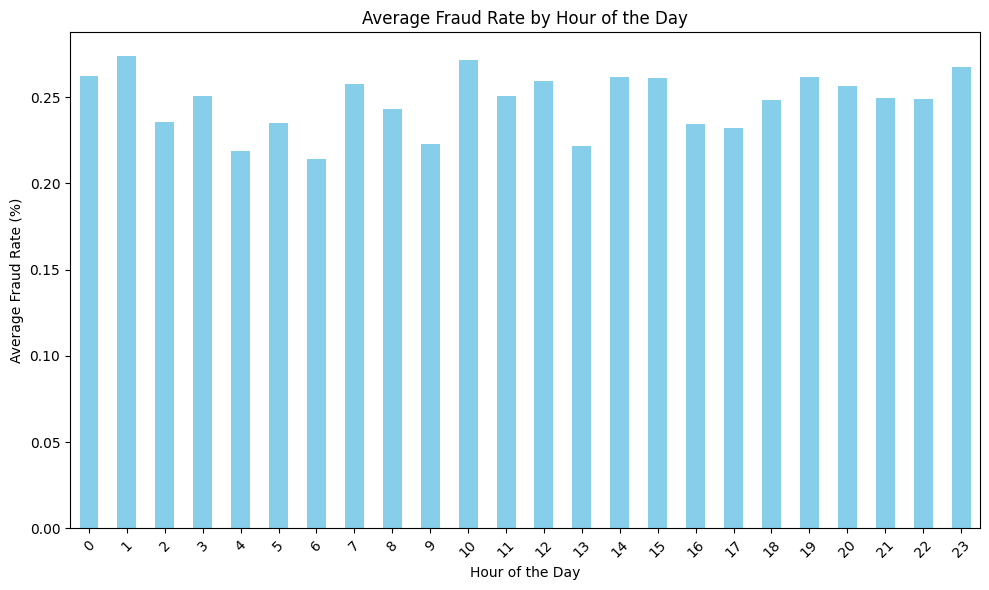

In [65]:
hourly_fraud_rate = data.groupby('incident_hour_of_the_day')['fraud_rate'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
hourly_fraud_rate.plot(kind='bar', color='skyblue')
plt.title('Average Fraud Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_location,incident_hour_of_the_day,...,auto_model,auto_year,fraud_reported,auto_make_1,auto_make_2,auto_make_3,auto_make_4,auto_make_5,auto_make_6,auto_make_7,auto_make_8,auto_make_9,auto_make_10,auto_make_11,auto_make_12,auto_make_13,incident_city_1,incident_city_2,incident_city_3,incident_city_4,incident_city_5,incident_city_6,auto_make,incident_city,fraud_rate
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,2,2,0,3,4,996,5,...,1,2004,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,10,1,0.268817
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,1,1,3,5,628,8,...,12,2007,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,8,5,0.571429
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,1,1,3,1,685,7,...,30,2007,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,4,1,0.142857
3,256,41,227811,1990-05-25,0,250/500,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-01-10,2,0,0,3,2,669,5,...,34,2014,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,1,0.500000
4,228,44,367455,2014-06-06,0,500/1000,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17,3,1,1,3,1,220,20,...,31,2009,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,0.000000


Average Fraud Rate by Insured Sex:
insured_sex
1    24.95%
0    24.48%
Name: fraud_rate, dtype: object


Average Fraud Rate by Insured Education Level:
insured_education_level
4    26.83%
6    25.26%
0    25.14%
2    24.37%
1    24.05%
5    23.69%
3    23.68%
Name: fraud_rate, dtype: object


Average Fraud Rate by Insured Occupation:
insured_occupation
12    28.14%
2     27.72%
7     25.82%
8     25.80%
4     25.12%
3     24.78%
6     24.06%
13    23.92%
11    23.74%
9     23.62%
5     23.39%
10    23.24%
1     23.03%
0     22.85%
Name: fraud_rate, dtype: object


Average Fraud Rate by Insured Relationship:
insured_relationship
2    25.51%
4    25.43%
0    25.42%
1    24.07%
5    23.94%
3    23.93%
Name: fraud_rate, dtype: object


Average Fraud Rate by Insured Hobbies:
insured_hobbies
5     29.19%
6     28.38%
2     26.42%
10    25.99%
15    25.94%
0     25.57%
14    25.16%
13    25.11%
12    24.73%
19    24.64%
3     24.63%
16    24.44%
17    24.14%
11    23.71%
8     23.27%
4     23

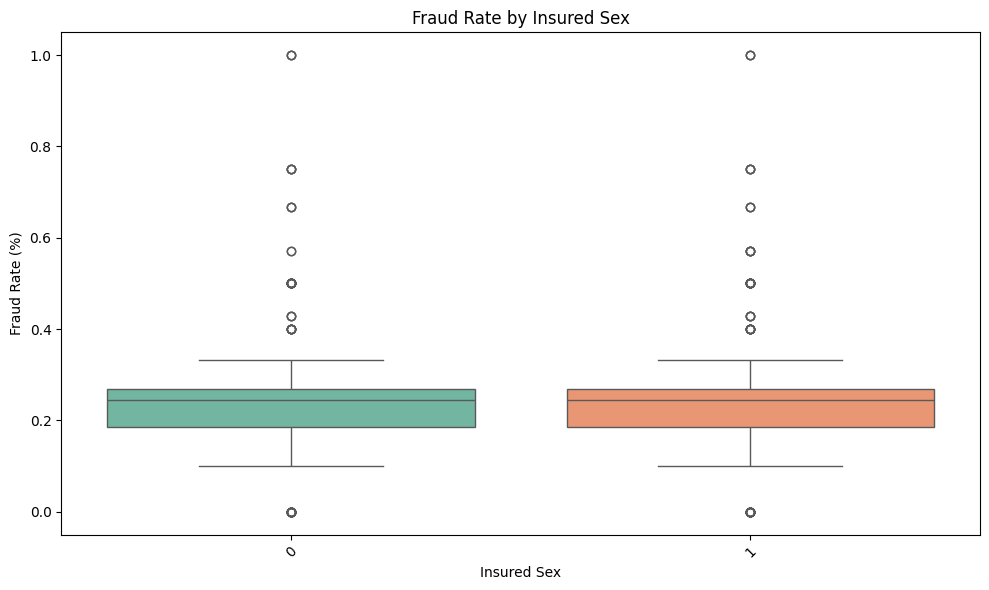

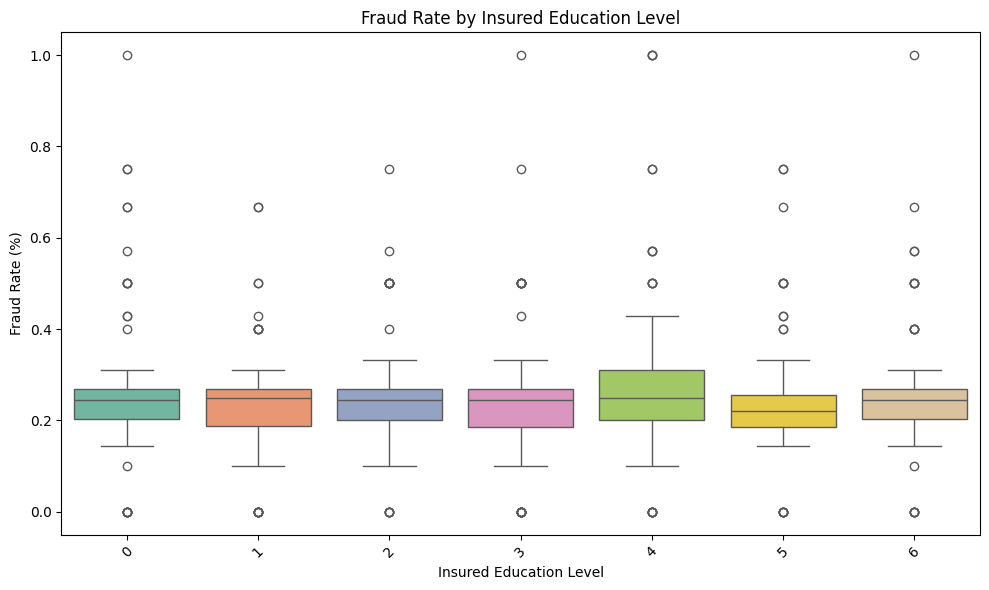

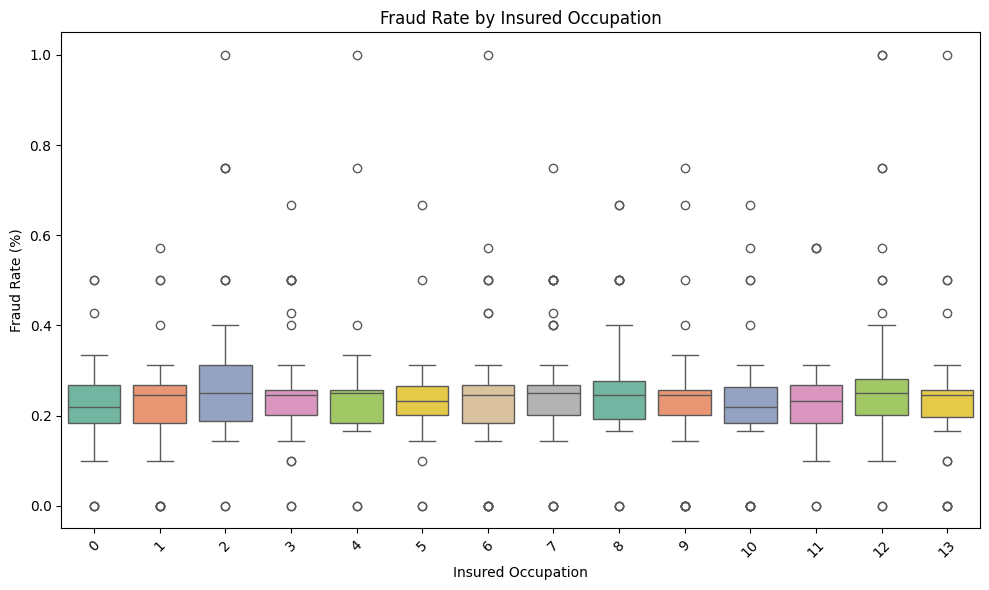

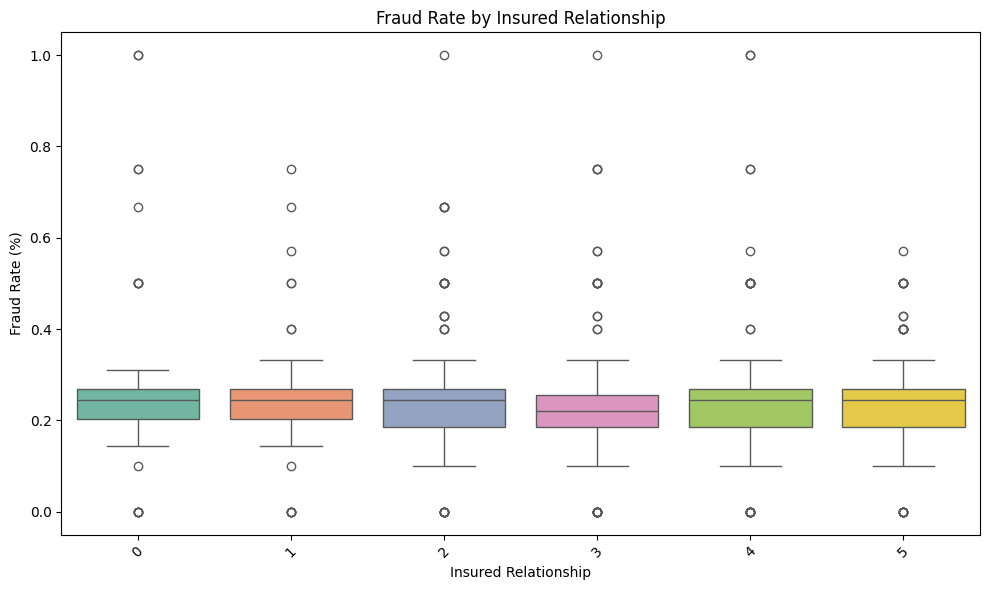

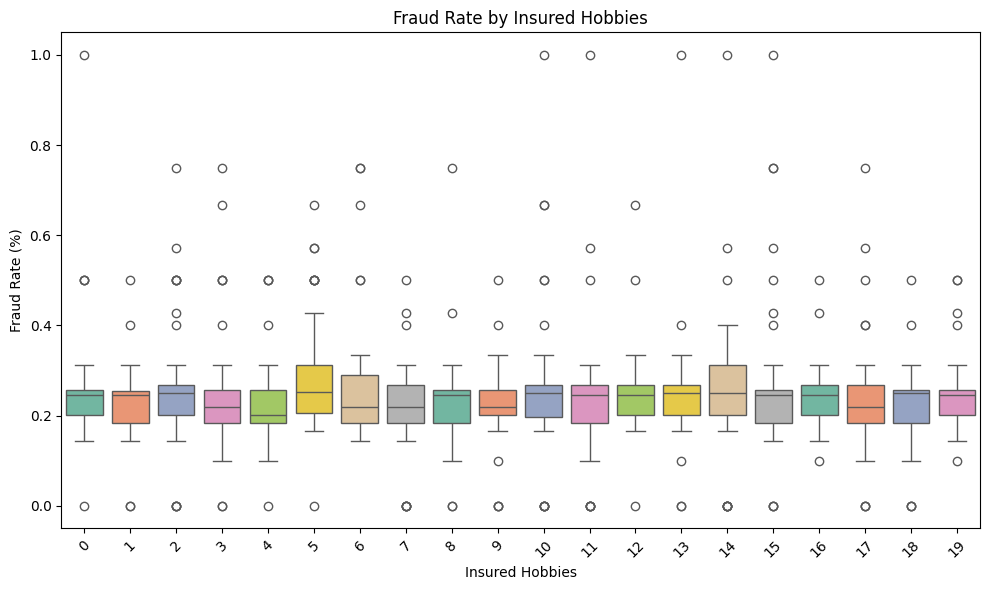

In [76]:
demographic_columns = ['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'insured_hobbies']

# Function to display the average fraud rate in a nicer format
def display_avg_fraud_rate(data, column):
    avg_fraud = data.groupby(column)['fraud_rate'].mean().sort_values(ascending=False)
    print(f"Average Fraud Rate by {column.replace('_', ' ').title()}:")
    print(avg_fraud.apply(lambda x: f"{x*100:.2f}%"))
    print("\n")

# Loop through each demographic column and calculate the average fraud rate
for column in demographic_columns:
    display_avg_fraud_rate(data, column)

# Loop through each demographic column and create boxplots
for column in demographic_columns:
    plt.figure(figsize=(10, 6))
    sb.boxplot(x=column, y='fraud_rate', data=data, palette="Set2")
    plt.title(f'Fraud Rate by {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Fraud Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


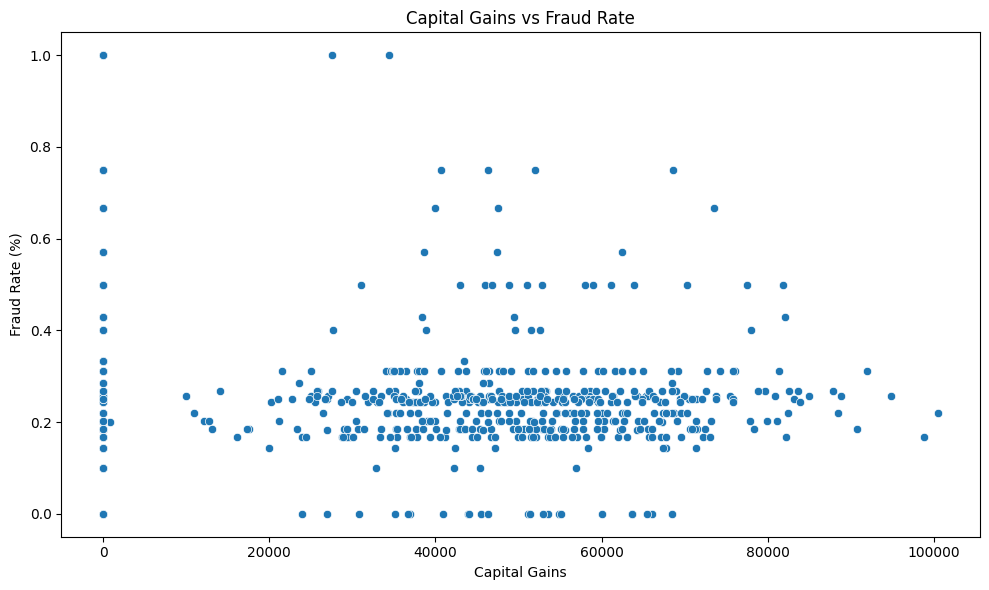

In [78]:
# Capital Gains vs Fraud Rate
plt.figure(figsize=(10, 6))
sb.scatterplot(x='capital-gains', y='fraud_rate', data=data, palette="Set2")
plt.title('Capital Gains vs Fraud Rate')
plt.xlabel('Capital Gains')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()


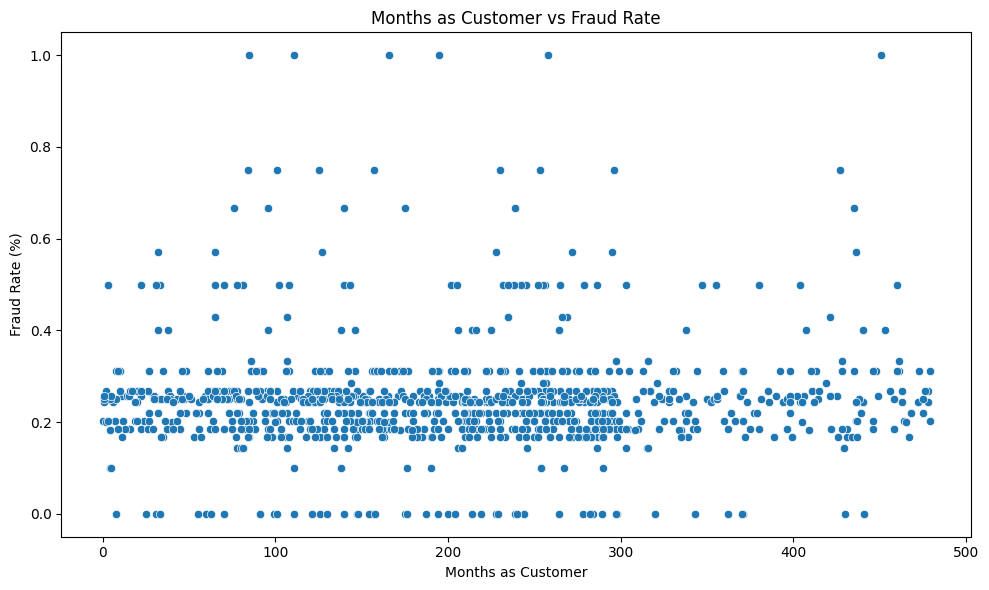

In [80]:
# Months as Customer vs Fraud Rate
plt.figure(figsize=(10, 6))
sb.scatterplot(x='months_as_customer', y='fraud_rate', data=data, palette="Set2")
plt.title('Months as Customer vs Fraud Rate')
plt.xlabel('Months as Customer')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

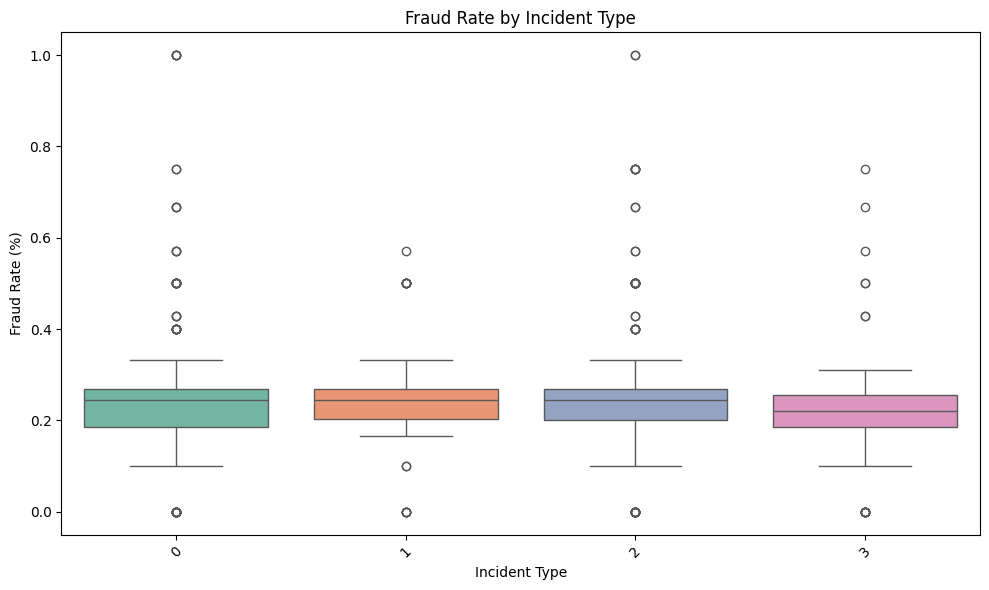

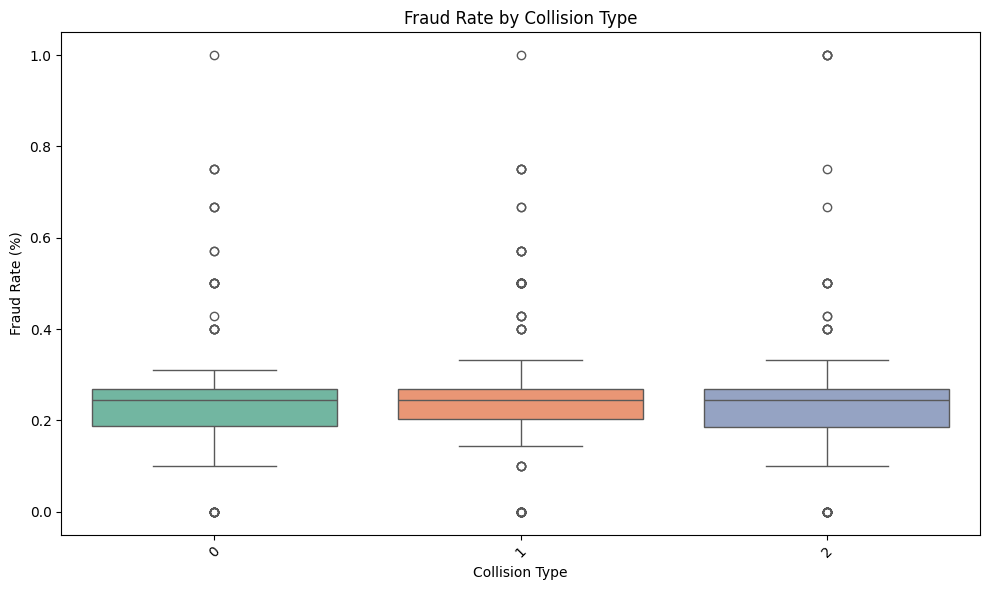

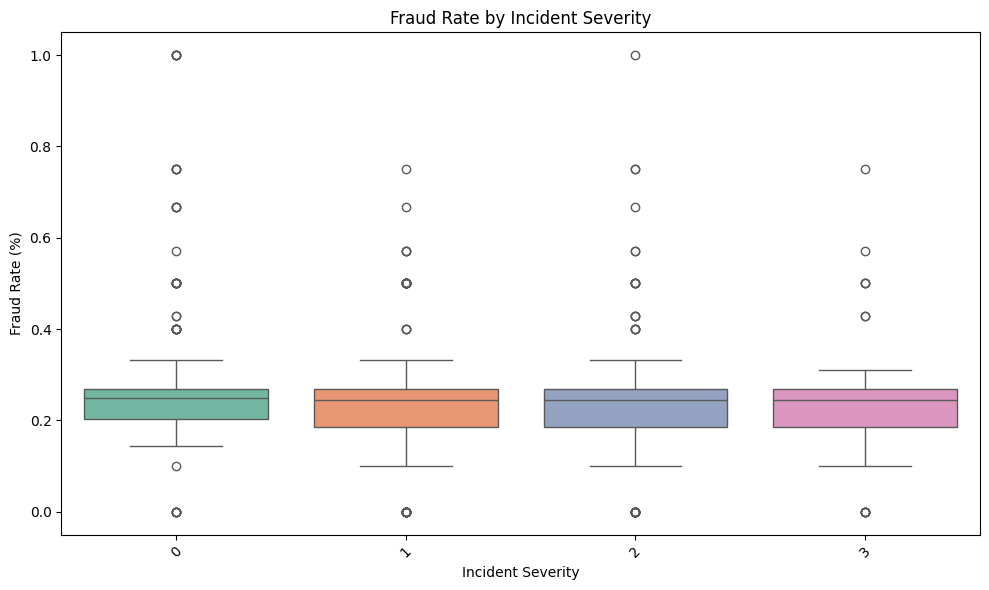

In [81]:
# Incident Type vs Fraud Rate
incident_type_columns = ['incident_type', 'collision_type', 'incident_severity']
for column in incident_type_columns:
    plt.figure(figsize=(10, 6))
    sb.boxplot(x=column, y='fraud_rate', data=data, palette="Set2")
    plt.title(f'Fraud Rate by {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Fraud Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


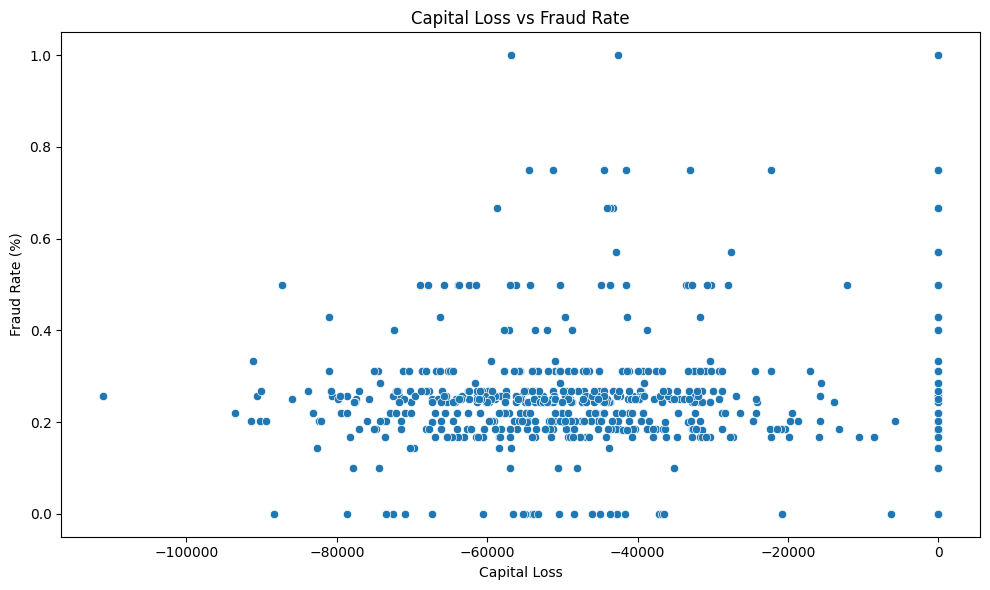

In [82]:
# Capital Loss vs Fraud Rate
plt.figure(figsize=(10, 6))
sb.scatterplot(x='capital-loss', y='fraud_rate', data=data, palette="Set2")
plt.title('Capital Loss vs Fraud Rate')
plt.xlabel('Capital Loss')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()
